In [14]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

In [30]:
np.random.seed(1)
df=pd.DataFrame({
    'X1':np.random.normal(0,2,10000),
    'X2':np.random.normal(5,3,10000),
    'X3':np.random.normal(-5,5,10000)
})
df.head()

,X1,X2,X3
0,3.248691,4.632578,-14.657819
1,-1.223513,5.684509,-5.802131
2,-1.056344,3.943085,-9.161098
3,-2.145937,2.508340,-6.030558
4,1.730815,4.216731,0.131275


In [31]:
df.tail()

,X1,X2,X3
9995,0.145917,2.170375,-1.550878
9996,0.978204,7.346647,-2.235902
9997,-2.028288,12.225301,-5.419191
9998,-0.125392,7.648357,-11.417673
9999,-2.875740,4.701211,-3.288438


In [32]:
df.describe

<bound method NDFrame.describe of             X1         X2         X3
0     3.248691   4.632578 -14.657819
1    -1.223513   5.684509  -5.802131
2    -1.056344   3.943085  -9.161098
3    -2.145937   2.508340  -6.030558
4     1.730815   4.216731   0.131275
...        ...        ...        ...
9995  0.145917   2.170375  -1.550878
9996  0.978204   7.346647  -2.235902
9997 -2.028288  12.225301  -5.419191
9998 -0.125392   7.648357 -11.417673
9999 -2.875740   4.701211  -3.288438

[10000 rows x 3 columns]>

In [33]:
df.info

<bound method DataFrame.info of             X1         X2         X3
0     3.248691   4.632578 -14.657819
1    -1.223513   5.684509  -5.802131
2    -1.056344   3.943085  -9.161098
3    -2.145937   2.508340  -6.030558
4     1.730815   4.216731   0.131275
...        ...        ...        ...
9995  0.145917   2.170375  -1.550878
9996  0.978204   7.346647  -2.235902
9997 -2.028288  12.225301  -5.419191
9998 -0.125392   7.648357 -11.417673
9999 -2.875740   4.701211  -3.288438

[10000 rows x 3 columns]>

In [34]:
df.isnull()

,X1,X2,X3
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9995,False,False,False
9996,False,False,False
9997,False,False,False
9998,False,False,False


In [35]:
pandas_profiling.ProfileReport(df)

In [36]:
scaler  = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[ 1.61653543, -0.13175263, -1.9247574 ],
       [-0.62228462,  0.21847458, -0.14641572],
       [-0.53859835, -0.36131085, -0.82094159],
       ...,
       [-1.02516118,  2.39614871, -0.06951623],
       [-0.07255698,  0.87231272, -1.27409225],
       [-1.44940235, -0.10890221,  0.35836759]])

In [37]:
scaled_df = pd.DataFrame(scaled_df, columns=['X1','X2','X3'])
scaled_df.head()

,X1,X2,X3
0,1.616535,-0.131753,-1.924757
1,-0.622285,0.218475,-0.146416
2,-0.538598,-0.361311,-0.820942
3,-1.084057,-0.838991,-0.192287
4,0.856675,-0.270204,1.045092


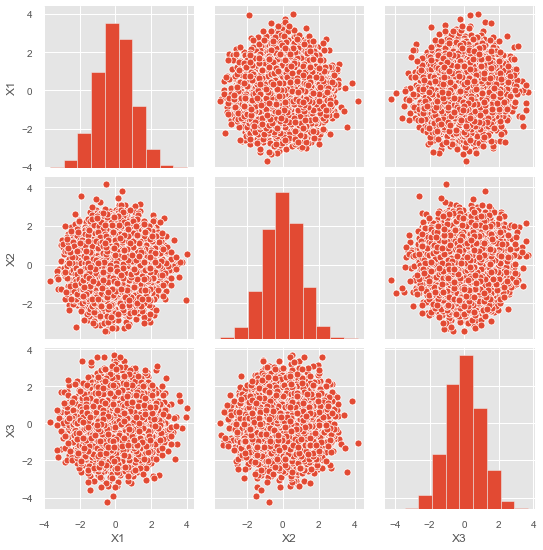

In [38]:
sns.pairplot(scaled_df,diag_kind='hist')

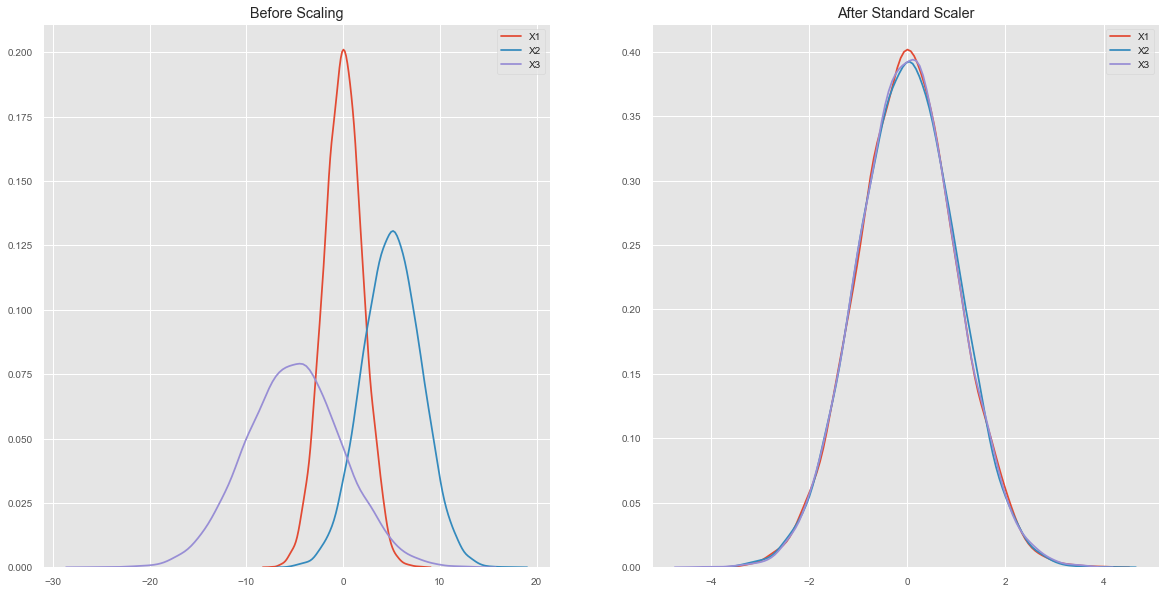

In [39]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(20,10))

ax1.set_title("Before Scaling")
sns.kdeplot(df['X1'],ax=ax1)
sns.kdeplot(df['X2'],ax=ax1)
sns.kdeplot(df['X3'],ax=ax1)

ax2.set_title("After Standard Scaler")
sns.kdeplot(scaled_df['X1'],ax=ax2)
sns.kdeplot(scaled_df['X2'],ax=ax2)
sns.kdeplot(scaled_df['X3'],ax=ax2)
plt.show()

In [40]:
df = pd.DataFrame({
    # positive skew(left hist)
    'X1' : np.random.chisquare(8,1000),
    # negative skew
    'X2' : np.random.beta(8,2,1000) * 40,
    # no skew
    'X3' : np.random.normal(50,3,1000)
})

In [41]:
df.head()

,X1,X2,X3
0,8.913396,33.282653,54.509849
1,5.583017,38.986294,52.473472
2,19.713205,26.377055,48.803613
3,23.293714,31.520740,50.593609
4,11.508381,38.646724,49.702286


In [43]:
pandas_profiling.ProfileReport(df)

In [44]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df =pd.DataFrame(scaled_df,columns=['X1','X2','X3'])

In [45]:
scaled_df.head()

,X1,X2,X3
0,0.320592,0.776009,0.748636
1,0.184702,0.971903,0.645125
2,0.761260,0.538834,0.458583
3,0.907357,0.715496,0.549570
4,0.426476,0.960240,0.504263


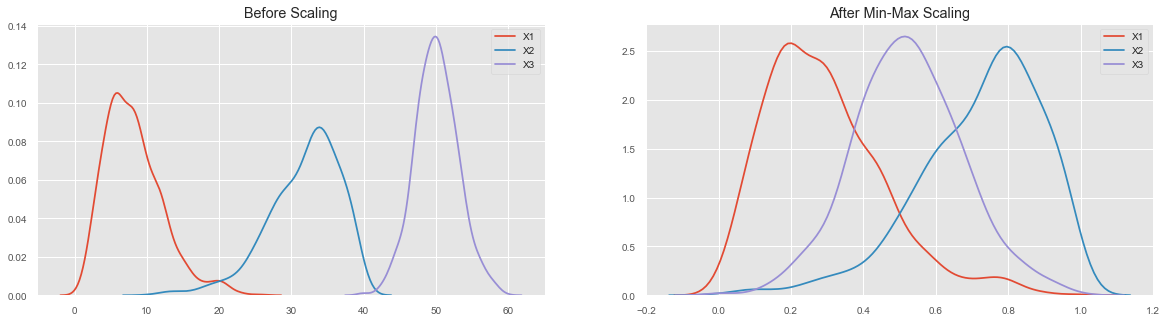

In [46]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))

ax1.set_title("Before Scaling")
sns.kdeplot(df['X1'],ax=ax1)
sns.kdeplot(df['X2'],ax=ax1)
sns.kdeplot(df['X3'],ax=ax1)

ax2.set_title("After Min-Max Scaling")
sns.kdeplot(scaled_df['X1'],ax=ax2)
sns.kdeplot(scaled_df['X2'],ax=ax2)
sns.kdeplot(scaled_df['X3'],ax=ax2)
plt.show()

In [47]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'X1' : np.concatenate([np.random.normal(20,1,1000),np.random.normal(1,1,25)]),
    # Distribution with higher outliers
    'X2' : np.concatenate([np.random.normal(30,1,1000),np.random.normal(50,1,25)])
})
x.head()

,X1,X2
0,21.289328,30.339567
1,20.475220,28.989049
2,20.472324,29.108980
3,17.862670,30.381639
4,20.554138,28.639373


In [48]:
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df,columns=['X1','X2'])

In [57]:
robust_scaled_df.head()

,X1,X2
0,0.946526,0.203267
1,0.319729,-0.692477
2,0.317499,-0.612932
3,-1.691723,0.231172
4,0.380490,-0.924403


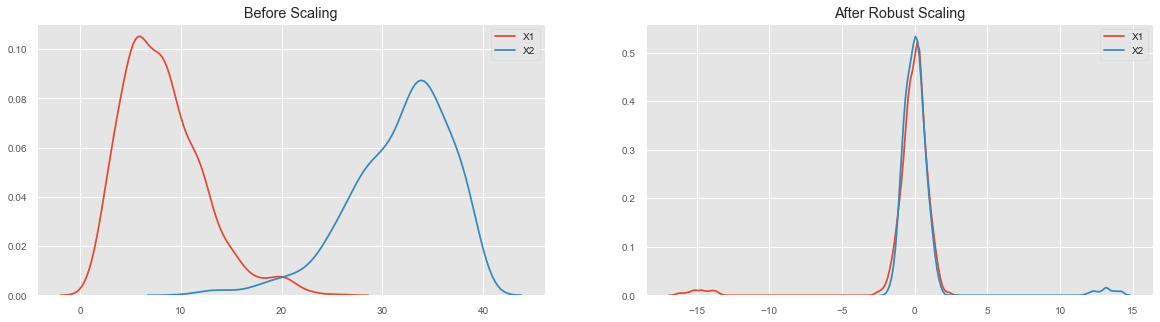

In [59]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))

ax1.set_title("Before Scaling")
sns.kdeplot(df['X1'],ax=ax1)
sns.kdeplot(df['X2'],ax=ax1)

ax2.set_title("After Robust Scaling")
sns.kdeplot(robust_scaled_df['X1'],ax=ax2)
sns.kdeplot(robust_scaled_df['X2'],ax=ax2)

plt.show()

In [50]:
scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df,columns=['X1','X2'])

In [51]:
minmax_scaled_df.head()

,X1,X2
0,0.922261,0.125539
1,0.888763,0.069703
2,0.888644,0.074662
3,0.781266,0.127279
4,0.892010,0.055246


In [53]:
Maxabs=preprocessing.MaxAbsScaler()
minmaxabs=Maxabs.fit_transform(x)
minmaxabs=pd.DataFrame(minmaxabs,columns=['X1','X2'])

In [54]:
minmaxabs.head()

,X1,X2
0,0.918488,0.589228
1,0.883365,0.563000
2,0.883240,0.565329
3,0.770651,0.590045
4,0.886770,0.556208


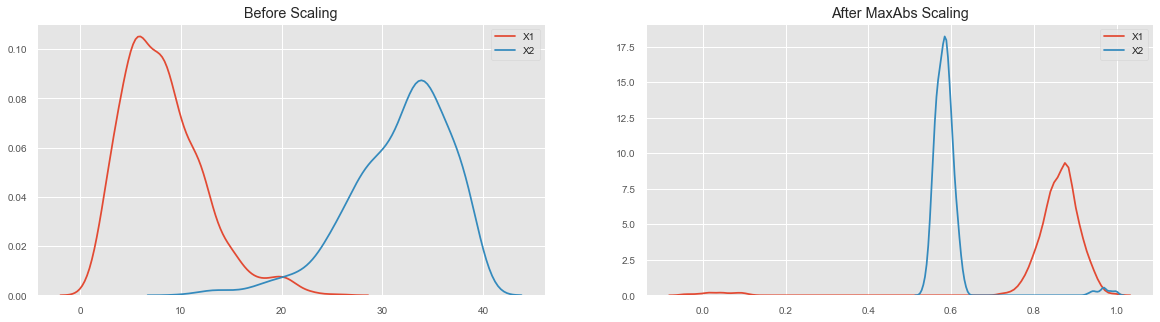

In [60]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))

ax1.set_title("Before Scaling")
sns.kdeplot(df['X1'],ax=ax1)
sns.kdeplot(df['X2'],ax=ax1)

ax2.set_title("After MaxAbs Scaling")
sns.kdeplot(minmaxabs['X1'],ax=ax2)
sns.kdeplot(minmaxabs['X2'],ax=ax2)
plt.show()

In [61]:
from mpl_toolkits.mplot3d import Axes3D

df=pd.DataFrame({
    'X1' : np.random.randint(-100,100,1000).astype(float),
    'Y1' : np.random.randint(-80,80,1000).astype(float),
    'Z1' : np.random.randint(-150,150,1000).astype(float)
})

In [62]:
df.head()

,X1,Y1,Z1
0,-7.0,-68.0,67.0
1,64.0,-5.0,-82.0
2,-99.0,62.0,8.0
3,58.0,32.0,-26.0
4,50.0,9.0,123.0


In [63]:
df.tail()

,X1,Y1,Z1
995,59.0,-69.0,15.0
996,-99.0,0.0,21.0
997,88.0,20.0,103.0
998,-58.0,-68.0,-40.0
999,-94.0,-22.0,107.0


In [64]:
scaler=preprocessing.Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,columns=df.columns)

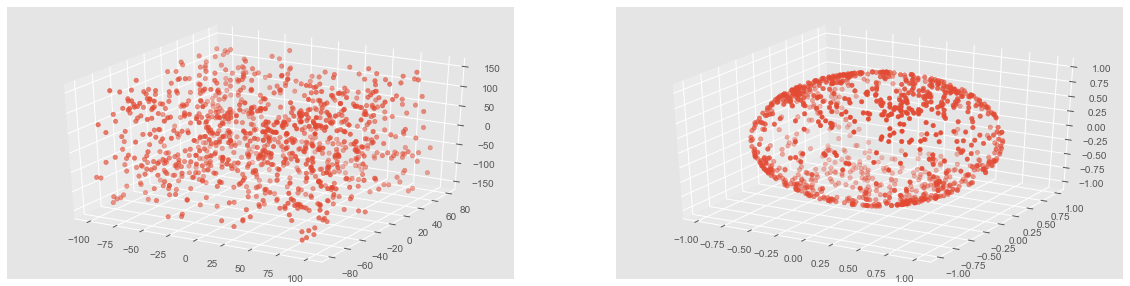

In [66]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122,projection='3d')
                      
ax1.scatter(df['X1'],df['Y1'],df['Z1'])
ax2.scatter(scaled_df['X1'],scaled_df['Y1'],scaled_df['Z1'])
plt.show()

# Non Linear transformation
* Non linear transformations are divided into two types of transformations.These are available in
    * Quantile Transformation
        * Uniform
        * Gaussian